This is a Datathon competition for 5 months ago, when I found this dataset....

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

This weekend, we are back with another Janatahack, this time dealing in a problem statement on customer segmentation. Stay tuned and make the maximum out of this learning opportunity.

# Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

# Content
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

| Name                | Character                                                         |
| ---                 | ---                                                               |
| ID                  |  Unique ID                                                        |
| Gender              | Gender of the customer                                            |
| Ever_Married        | Marital status of the customer                                    |
| Age                 | Age of the customer                                               |
| Graduated           | Is the customer a graduate?                                       |
| Profession          | Profession of the customer                                        |
| Work_Experience     | Work Experience in years                                          |
| Spending_Score      | Spending score of the customer                                    |
| Family_Size         | Number of family members for the customer(including the customer) |
| Var_1               | Anonymised Category for the customer                              |
| Segmentation(target)| Customer Segment of the customer                                  |
 


In [1]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn


In [2]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)


In [4]:
# Load Data

In [5]:
df_train = pd.read_csv('./data/Train.csv') # exisiting customers data with label 'segmentation'
df_test = pd.read_csv('./data/Test.csv') # new customers data
print('train data diemnsion: ', df_train.shape)
print('test data diemnsion: ', df_test.shape)


train data diemnsion:  (8068, 11)
test data diemnsion:  (2627, 10)


In [6]:
# check if there are additional features columns in test data
addtional_col = []
for col in df_test.columns:
    if col not in df_train.columns:
        addtional_col.append(col)
if len(addtional_col) != 0:
    print('Additional column(s) in test data: ', addtional_col)
else:
    print('In the test data, all the features columns are in line with train data')
    

In the test data, all the features columns are in line with train data


we know the data features are the same from both train and test data. tran dataset has the label "Segmentation". The "Segmentation" is our target variable to predict in this study.

In [7]:
def data_check_basic(df):
    """simple helper peform basic data check
    """
    print('<------- Dimension: -------> \n')
    print(df.shape) # dimensions
    print('\n<------- Unique values: -------> \n')
    print(df.nunique()) # unique values
    print('\n<------- Check dtype: -------> \n')
    print(df.info()) # check dtype
    print('\n<------- Check missing vlaues (count): -------> \n')
    print(df.isnull().sum()) # check nan count
    print('\n<------- Check missing vlaues (%): -------> \n')
    print(round(df.isnull().sum()/df_train.shape[0]*100, 2)) # check nan %
    print('\n<------- Quick look at data: -------> \n')
    
    return df.head()


In [8]:
# check train data
data_check_basic(df_train)

<------- Dimension: -------> 

(8068, 11)

<------- Unique values: -------> 

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

<------- Check dtype: -------> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float6

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
# check test data
data_check_basic(df_test)


<------- Dimension: -------> 

(2627, 10)

<------- Unique values: -------> 

ID                 2627
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

<------- Check dtype: -------> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


 1. From the overivew of the data, we also understand that the data involves different data types, including numerical and categorical inputs (binary and enum types).
 
 2. There are missing values in both train and test data. In the data processing section, we will deal with the imputation problems before meanifully conduct the Exploratory Data Analysis as well as modeling.




In [10]:
obs_train = df_train.shape[0]
print('Indicator number to show the last row for the traning set: ', obs_train)

# merge the train and test data to construct the final modeling data
# note that test data is not used for training and validation purpose. 
# validation set will be drawn from train dataset

# prepare for combining dataset
df_test['Segmentation'] = 'To_Be_Predicted_do_not_use'

modeling = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

# # flag whether it's a train or test dataset
# modeling['train_test_flag'] = modeling['Segmentation']\
#                                 .apply(lambda x: 'train' if x != 'To_Be_Predicted_do_not_use' else 'test')



Indicator number to show the last row for the traning set:  8068


In [11]:
data_check_basic(modeling)


<------- Dimension: -------> 

(10695, 11)

<------- Unique values: -------> 

ID                 8363
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          5
dtype: int64

<------- Check dtype: -------> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  flo

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [12]:
# Data Processeing

In [13]:
modeling.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,To_Be_Predicted_do_not_use
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,To_Be_Predicted_do_not_use
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,To_Be_Predicted_do_not_use
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,To_Be_Predicted_do_not_use
10694,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,To_Be_Predicted_do_not_use


In [14]:
####################3##########3##########3

In [15]:
# Data Imputations & Strategy

Need...explain imputations

In [16]:
# let's handle missing values later
# !{sys.executable} -m pip install miceforest
# !{sys.executable} -m pip install autoimpute


In [17]:
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer


In [18]:
modeling.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [19]:
pd.DataFrame(modeling.isnull().sum(), columns=["records missing"]).T


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
records missing,0,0,190,0,102,162,1098,0,448,108,0


In [20]:
# create a complex instance of the MiceImputer
# Here, we specify strategies by column and predictors for each column
# We also specify what additional arguments any `pmm` strategies should take

# si = SingleImputer(
#     strategy = {
#         'Gender': 'bayesian binary logistic',
#         'Ever_Married': 'bayesian binary logistic',
#         'Graduated': 'bayesian binary logistic',
#         'Profession': 'multinomial logistic',
#         'Work_Experience': 'norm',
#         'Family_Size': 'norm',
#         'Var_1': 'multinomial logistic'
        
#     },\
#     predictors = 'all',\
#     imp_kwgs = {
#         'pmm': {'neighbors': 10,
#                 'fill_value': 'median'
#                }
#     }

# )

si = SingleImputer(
    strategy = {
        'Profession': 'multinomial logistic'
        
    },\
    predictors = {"Profession": ["Spending_Score", "Family_Size", "Var_1"]}
    
)


# mice = MiceImputer(
#     n=10,
#     strategy={"salary": "pmm", "gender": "bayesian binary logistic", "age": "norm"},
#     predictors={"salary": "all", "gender": ["salary", "education", "weight"]},
#     imp_kwgs={"pmm": {"fill_value": "random"}},
#     visit="left-to-right",
#     return_list=True
# )

# Because we set return_list=True, imputations are done all at once, not evaluated lazily.
# This will return M*N, where M is the number of imputations and N is the size of original dataframe.

pred_feature_all = [
    'ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
    'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'
]


tmp = df_train.copy()
modeling_imputed = si.fit_transform(tmp)


/Users/tsung-chin.han/ZDOC/Interview_2021_great/Tableau/customer_expectation/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [21]:
pd.DataFrame(modeling_imputed.isnull().sum(), columns=["records missing"]).T


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
records missing,0,0,140,0,78,0,829,0,335,76,0


In [22]:
pd.DataFrame(df_train.isnull().sum(), columns=["records missing"]).T


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
records missing,0,0,140,0,78,124,829,0,335,76,0


In [23]:
####################3##########3##########3

In [24]:
# suppose modeling dataset

In [25]:
# split up train and test 

In [20]:
df_train_imputed = modeling[:obs_train] # imputed training data


In [21]:
# EDA

In [22]:
# target variable

In [23]:
# !{sys.executable} -m pip install pandasql

In [24]:
from pandasql import sqldf


In [25]:
df_train_imputed.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


  Segmentation  count
0            A   1972
1            B   1858
2            C   1970
3            D   2268


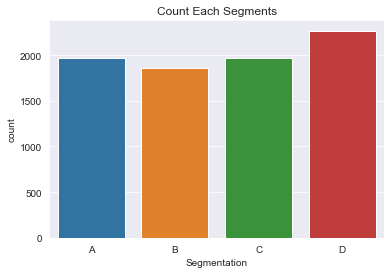

In [26]:
tmp = df_train_imputed.copy()
tmp = sqldf("""
select
    segmentation,
    count(segmentation) as count
from tmp
group by 1

""")
print(tmp)
sns.barplot(x='Segmentation' , y='count', data=tmp).set_title('Count Each Segments')
del tmp


In [27]:
# comment


In [28]:
# features - univariate analysis

In [29]:
df_train_imputed.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [30]:
# Gender


In [31]:
def plot_cat_feature_per_segment(df, feature):
    """
    """
    print('\033[1m'+'Feature - {}:\n'.format(feature))
    print('\033[0m'+'Value Counts in the training dataset:\n')
    print(df_train_imputed[feature].value_counts())

    # counting feature in each segment
    ax1 = df_train_imputed.groupby(['Segmentation'])[feature].value_counts().unstack().round(2)

    # percentage of feature in each segment
    ax2 = df_train_imputed.pivot_table(columns=feature,\
                                       index='Segmentation', \
                                       values='ID',\
                                       aggfunc='count')
    ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

    # plot1 - counting 
    fig, ax = plt.subplots(1,2)
    ax1.plot(kind="bar",ax = ax[0],figsize = (15,5))
    ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
    ax[0].set_title(str(ax1))

    # plot2 - stacked bars
    ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,5))
    ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
    ax[1].set_title(str(ax2))
    plt.show()
    


Feature - Gender:

Value Counts in the training dataset:

Male      4417
Female    3651
Name: Gender, dtype: int64


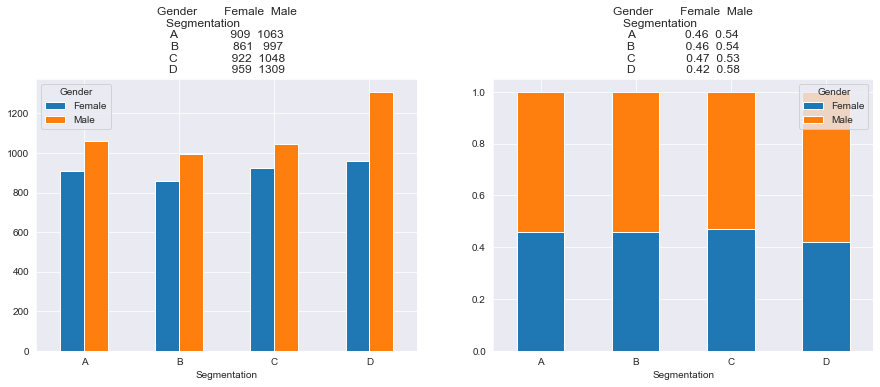

In [32]:
plot_cat_feature_per_segment(df_train_imputed, feature='Gender')

In [33]:
# Ever_Married

Feature - Ever_Married:

Value Counts in the training dataset:

Yes    4643
No     3285
Name: Ever_Married, dtype: int64


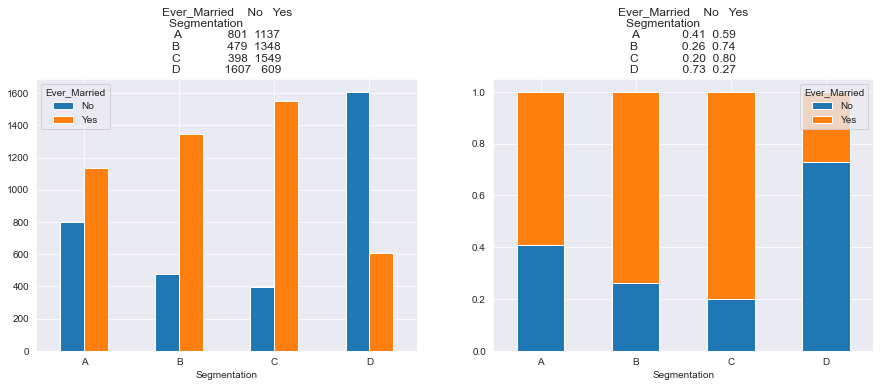

In [34]:
plot_cat_feature_per_segment(df_train_imputed, feature='Ever_Married')

In [35]:
df_train_imputed

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [36]:
# Age

In [37]:
def plot_num_feature_per_segment(df, feature):
    """
    """

    # Looking the distribution of column Age
    plt.figure(figsize=(12,8))
    skewness = round(df[feature].skew(),2)
    kurtosis = round(df[feature].kurtosis(),2)
    mean = round(np.mean(df[feature]),0)
    median = np.median(df[feature])

    plt.subplot(1,2,1)
    sns.boxplot(y=df[feature])
    plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean, median, skewness, kurtosis))

    plt.subplot(1,2,2)
    sns.distplot(df[feature])
    plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean, median, skewness, kurtosis))
    plt.show()

    # Looking the distribution of column Age w.r.t to each segment
    plt.figure(figsize=(12,8))

    plt.subplot(1,2,1)
    sns.boxplot(data=df, x="Segmentation", y=feature)
    plt.title('Boxplot')

    plt.subplot(1,2,2)
    group_mean = []
    for i in ['A', 'B', 'C', 'D']:
        group_mean.append(df[df.Segmentation == i][feature].mean())
        sns.kdeplot(df[df.Segmentation == i][feature], shade=False, label=i)

    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(group_mean[0],0),\
                                                            round(group_mean[1],0),\
                                                            round(group_mean[2],0),\
                                                            round(group_mean[3],0)))

    plt.show()
    
    del group_mean


/Users/tsung-chin.han/ZDOC/Interview_2021_great/Tableau/customer_expectation/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


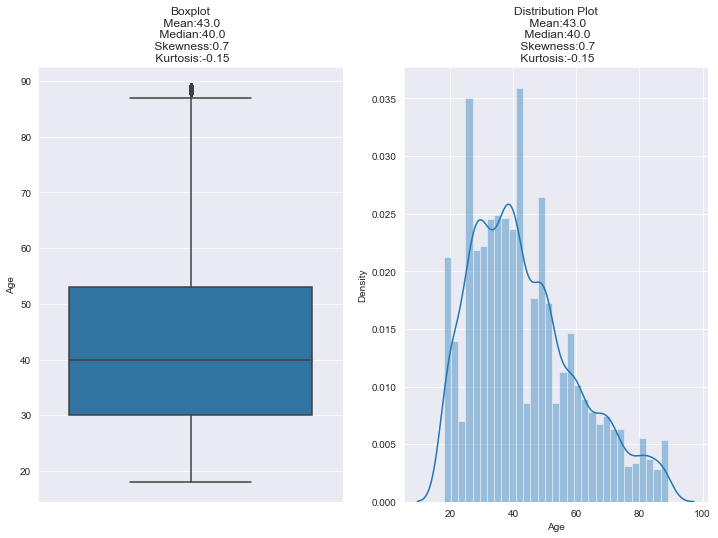

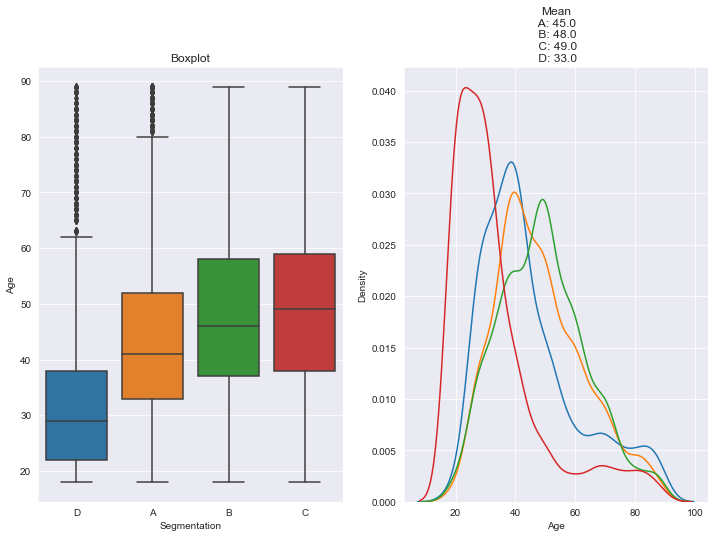

In [38]:
plot_num_feature_per_segment(df_train_imputed, feature= 'Age')

In [39]:
df_train_imputed.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])


count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [40]:
# Divide people in the 4 age group - cat var
df_train_imputed['Age_Bin'] = pd.cut(df_train_imputed.Age,\
                                     bins=[17,30,45,60,90],\
                                     labels=['30-','31-45','46-60','60+']
                                    )


<ipython-input-40-34f339cb636f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_imputed['Age_Bin'] = pd.cut(df_train_imputed.Age,\


Feature - Age_Bin:

Value Counts in the training dataset:

31-45    2840
30-      2026
46-60    1865
60+      1337
Name: Age_Bin, dtype: int64


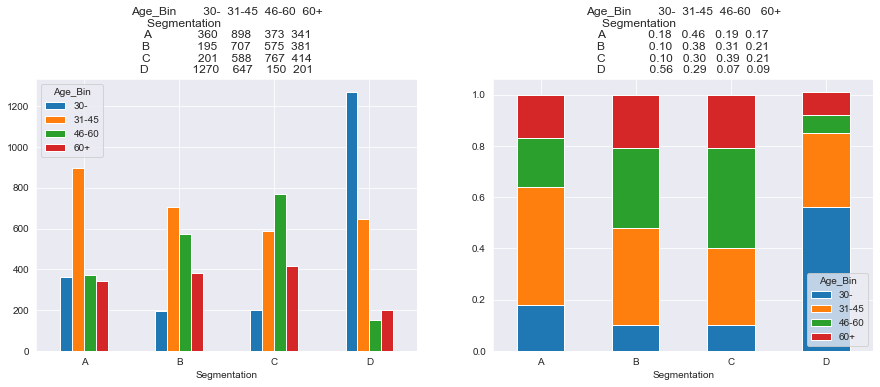

In [41]:
plot_cat_feature_per_segment(df_train_imputed, feature='Age_Bin')

In [42]:
# Graduated

Feature - Graduated:

Value Counts in the training dataset:

Yes    4968
No     3022
Name: Graduated, dtype: int64


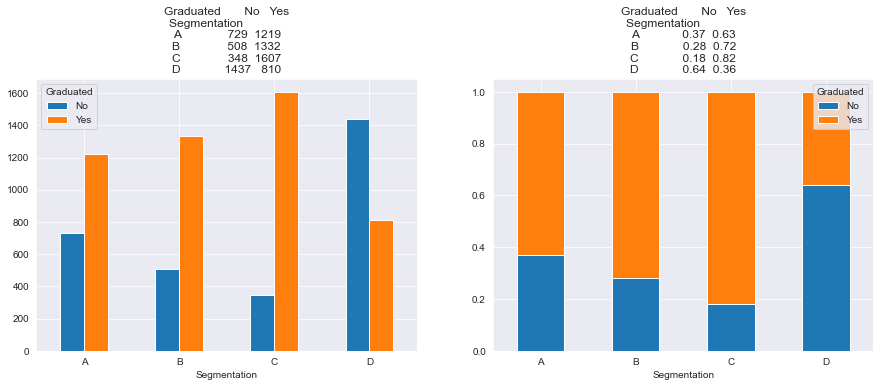

In [43]:
plot_cat_feature_per_segment(df_train_imputed, feature='Graduated')

In [44]:
# Profession

Feature - Profession:

Value Counts in the training dataset:

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64


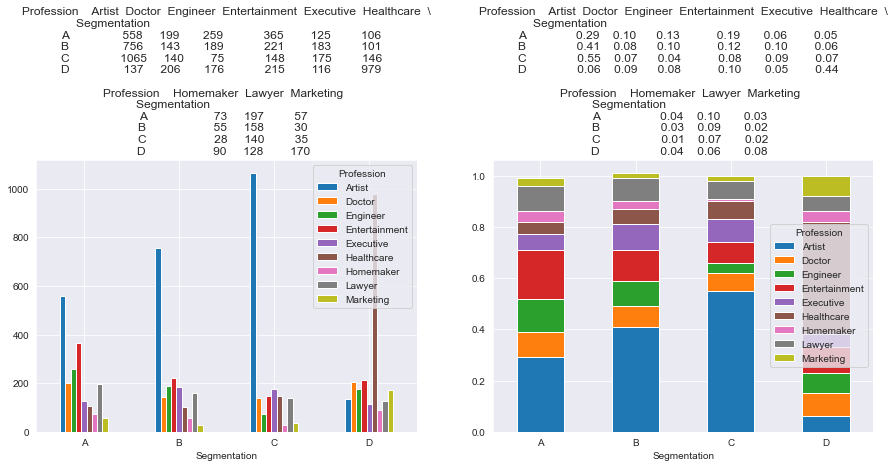

In [45]:
plot_cat_feature_per_segment(df_train_imputed, feature='Profession')

In [46]:
# Work_Experience

/Users/tsung-chin.han/ZDOC/Interview_2021_great/Tableau/customer_expectation/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


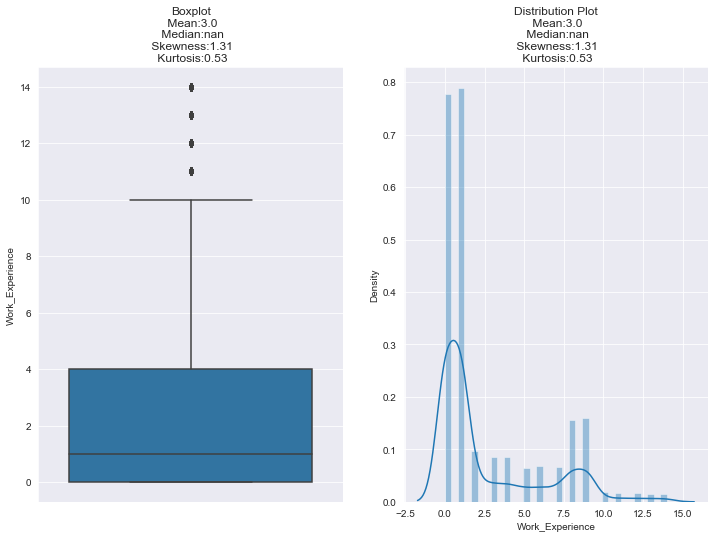

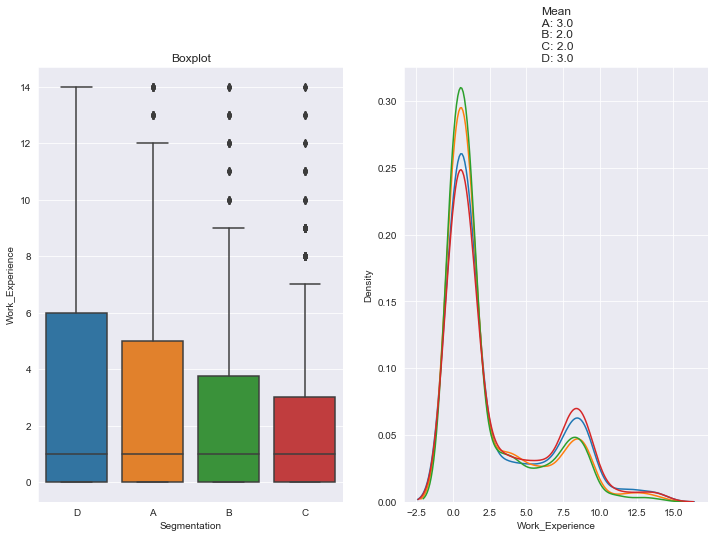

In [47]:
plot_num_feature_per_segment(df_train_imputed, feature= 'Work_Experience')

In [48]:
df_train_imputed.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])


count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
90%         8.000000
95%         9.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [49]:
# Dividing the people into 3 category of work experience 
df_train_imputed['Work_Exp_Category'] = pd.cut(df_train_imputed.Work_Experience,\
                                               bins=[-1, 1, 7, 15],\
                                               labels=['Low Experience','Medium Experience','High Experience']
                                              )


<ipython-input-49-559df8b711d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_imputed['Work_Exp_Category'] = pd.cut(df_train_imputed.Work_Experience,\


Feature - Work_Exp_Category:

Value Counts in the training dataset:

Low Experience       4672
Medium Experience    1388
High Experience      1179
Name: Work_Exp_Category, dtype: int64


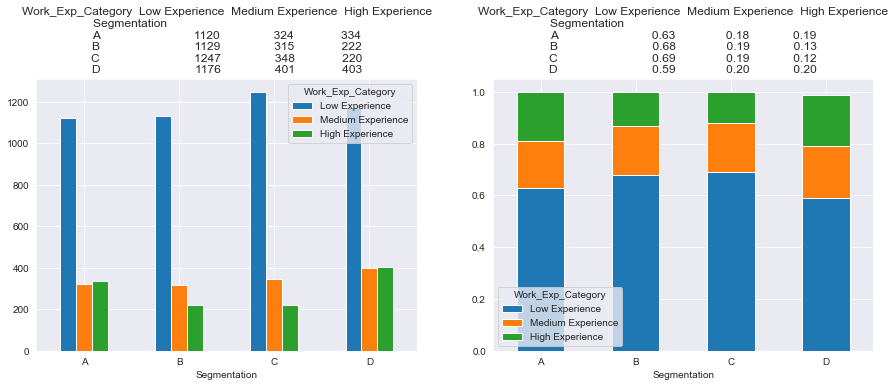

In [50]:
plot_cat_feature_per_segment(df_train_imputed, feature= 'Work_Exp_Category')


In [51]:
# Spending_Score

Feature - Spending_Score:

Value Counts in the training dataset:

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


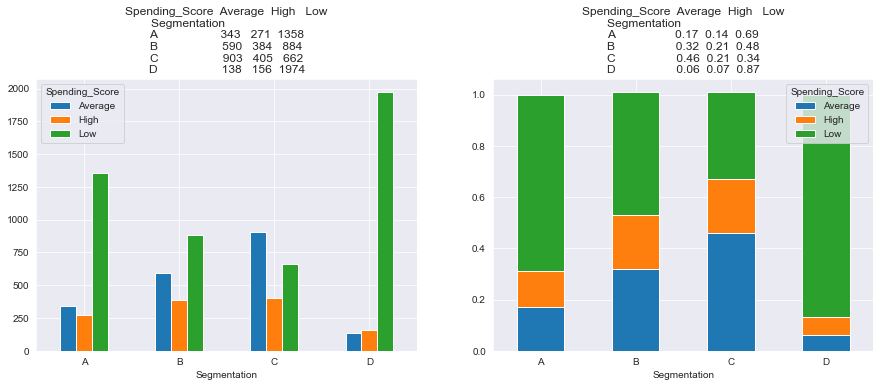

In [52]:
plot_cat_feature_per_segment(df_train_imputed, feature= 'Spending_Score')


In [53]:
df_train_imputed.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Bin', 'Work_Exp_Category'],
      dtype='object')

In [54]:
# Family_Size


Feature - Family_Size:

Value Counts in the training dataset:

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


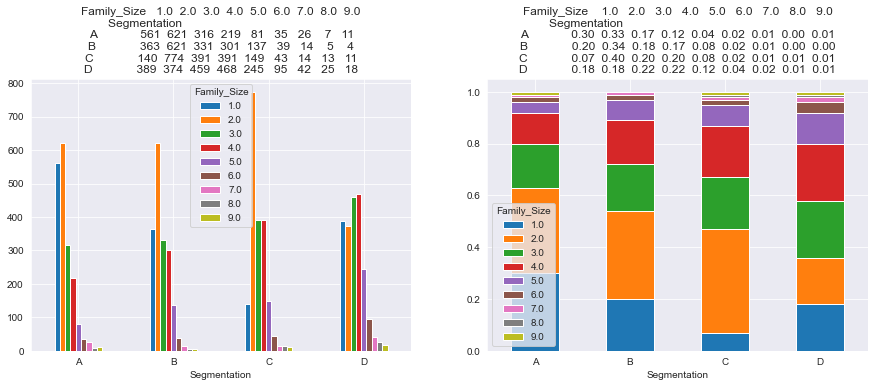

In [55]:
plot_cat_feature_per_segment(df_train_imputed, feature= 'Family_Size')


In [56]:
# Divide family size into 3 category
df_train_imputed['Family_Size_Category'] = pd.cut(df_train_imputed.Family_Size,\
                                                  bins=[0, 4, 6, 10],\
                                                  labels=['Small Family', 'Big Family', 'Joint Family']
                                                 )


<ipython-input-56-9b29bd65650d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_imputed['Family_Size_Category'] = pd.cut(df_train_imputed.Family_Size,\


Feature - Family_Size_Category:

Value Counts in the training dataset:

Small Family    6719
Big Family       824
Joint Family     190
Name: Family_Size_Category, dtype: int64


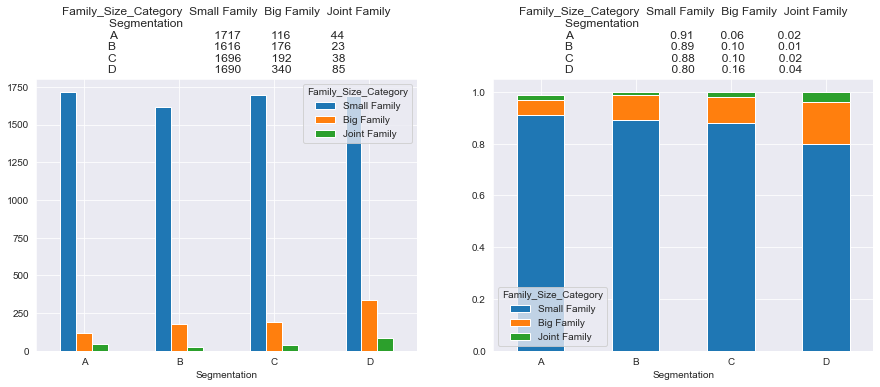

In [57]:
plot_cat_feature_per_segment(df_train_imputed, feature= 'Family_Size_Category')


In [58]:
# Var_1

Feature - Var_1:

Value Counts in the training dataset:

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


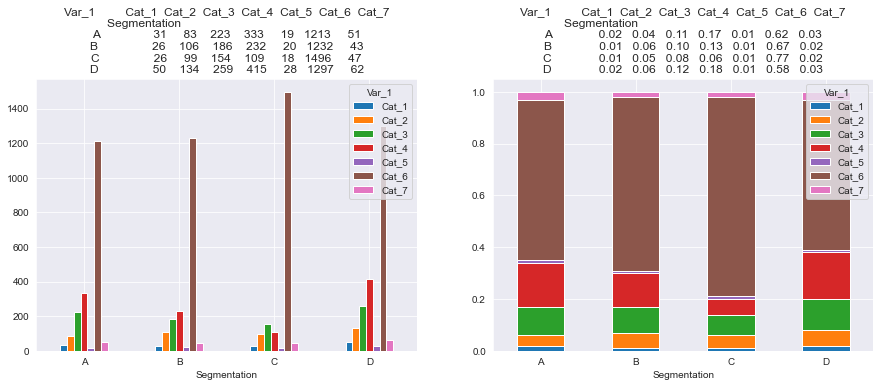

In [59]:
plot_cat_feature_per_segment(df_train_imputed, feature= 'Var_1')


In [60]:
# check the features's corr

In [61]:
df_train_imputed.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Bin', 'Work_Exp_Category', 'Family_Size_Category'],
      dtype='object')

In [62]:
df_train_imputed = df_train_imputed.drop(['Age_Bin', 'Work_Exp_Category', 'Family_Size_Category'], axis=1)


In [63]:
# modeling prep for ML

In [159]:
# feature eng

In [160]:
# prep final modeling dataset

In [127]:
modeling_2 = modeling.copy()

In [128]:
# get rid of customer id
modeling_2.drop(['ID'], axis=1, inplace=True)

train_final = modeling_2[:obs_train]
test_final = modeling_2[obs_train:]
print('modeling train data shape: ', train_final.shape)
print('modeling test data shape: ', test_final.shape)



modeling train data shape:  (8068, 10)
modeling test data shape:  (2627, 10)


In [129]:
# encoding

In [130]:
# encoding for binary variables

modeling_2['Gender'] = modeling_2['Gender']\
                        .apply(lambda x: 1 if x == 'Male' else 0)

modeling_2['Ever_Married'] = modeling_2['Ever_Married']\
                            .apply(lambda x: 1 if x == 'Yes' else 0)

modeling_2['Ever_Married'] = modeling_2['Ever_Married']\
                            .apply(lambda x: 1 if x == 'Yes' else 0)

modeling_2['Graduated'] = modeling_2['Graduated']\
                            .apply(lambda x: 1 if x == 'Yes' else 0)



In [131]:
def ohe_features(df, feature):
    """
    """
    # one-hot encoding
    tmp = pd.get_dummies(df[feature], prefix=feature + '_')
    df = pd.merge(df, tmp, left_index=True, right_index=True)   
    df.drop([feature], axis=1, inplace=True)
    if tmp.columns is not None:
        print('Following ohe has been generated: {}'.format([col for col in tmp.columns]))
        print('\n')
        return df
    else:
        print('error, check!\n')
        
    del tmp


In [132]:
# encoding for categorical variables by one-hot encoding

modeling_2 = ohe_features(modeling_2, feature='Profession')
modeling_2 = ohe_features(modeling_2, feature='Spending_Score')
modeling_2 = ohe_features(modeling_2, feature='Var_1')

modeling.columns

Following ohe has been generated: ['Profession__Artist', 'Profession__Doctor', 'Profession__Engineer', 'Profession__Entertainment', 'Profession__Executive', 'Profession__Healthcare', 'Profession__Homemaker', 'Profession__Lawyer', 'Profession__Marketing']


Following ohe has been generated: ['Spending_Score__Average', 'Spending_Score__High', 'Spending_Score__Low']


Following ohe has been generated: ['Var_1__Cat_1', 'Var_1__Cat_2', 'Var_1__Cat_3', 'Var_1__Cat_4', 'Var_1__Cat_5', 'Var_1__Cat_6', 'Var_1__Cat_7']




Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [89]:
# encoding for target

In [137]:
target_encoding_lookup = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'To_Be_Predicted_do_not_use': -1}
target_encoding_lookup


{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'To_Be_Predicted_do_not_use': -1}

In [140]:
modeling_2['Segmentation'] = modeling_2['Segmentation']\
                            .apply(lambda x: target_encoding_lookup[x])


In [141]:
modeling_2['Segmentation'].value_counts()

-1    2627
 4    2268
 1    1972
 3    1970
 2    1858
Name: Segmentation, dtype: int64

In [142]:
modeling_2.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession__Artist,Profession__Doctor,Profession__Engineer,Profession__Entertainment,Profession__Executive,Profession__Healthcare,Profession__Homemaker,Profession__Lawyer,Profession__Marketing,Spending_Score__Average,Spending_Score__High,Spending_Score__Low,Var_1__Cat_1,Var_1__Cat_2,Var_1__Cat_3,Var_1__Cat_4,Var_1__Cat_5,Var_1__Cat_6,Var_1__Cat_7
0,1,0,22,0,1.0,4.0,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,38,1,NaN,3.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,67,1,1.0,1.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,67,1,0.0,2.0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,0,40,1,NaN,6.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [143]:
# tmp --- delete this operation soon after done imputations!!!!!!!
modeling_2 = modeling_2.fillna(0)


In [116]:
modeling_2.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession__Artist,Profession__Doctor,Profession__Engineer,Profession__Entertainment,Profession__Executive,Profession__Healthcare,Profession__Homemaker,Profession__Lawyer,Profession__Marketing,Spending_Score__Average,Spending_Score__High,Spending_Score__Low,Var_1__Cat_1,Var_1__Cat_2,Var_1__Cat_3,Var_1__Cat_4,Var_1__Cat_5,Var_1__Cat_6,Var_1__Cat_7,Segmentation_enc
0,1,0,22,0,1.0,4.0,D,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,4
1,0,0,38,1,0.0,3.0,A,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,67,1,1.0,1.0,B,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
3,1,0,67,1,0.0,2.0,B,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,2
4,0,0,40,1,0.0,6.0,A,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [144]:
modeling_2.isnull().sum()

Gender                       0
Ever_Married                 0
Age                          0
Graduated                    0
Work_Experience              0
Family_Size                  0
Segmentation                 0
Profession__Artist           0
Profession__Doctor           0
Profession__Engineer         0
Profession__Entertainment    0
Profession__Executive        0
Profession__Healthcare       0
Profession__Homemaker        0
Profession__Lawyer           0
Profession__Marketing        0
Spending_Score__Average      0
Spending_Score__High         0
Spending_Score__Low          0
Var_1__Cat_1                 0
Var_1__Cat_2                 0
Var_1__Cat_3                 0
Var_1__Cat_4                 0
Var_1__Cat_5                 0
Var_1__Cat_6                 0
Var_1__Cat_7                 0
dtype: int64

In [145]:
modeling_2.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession__Artist,Profession__Doctor,Profession__Engineer,Profession__Entertainment,Profession__Executive,Profession__Healthcare,Profession__Homemaker,Profession__Lawyer,Profession__Marketing,Spending_Score__Average,Spending_Score__High,Spending_Score__Low,Var_1__Cat_1,Var_1__Cat_2,Var_1__Cat_3,Var_1__Cat_4,Var_1__Cat_5,Var_1__Cat_6,Var_1__Cat_7
0,1,0,22,0,1.0,4.0,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,38,1,0.0,3.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,67,1,1.0,1.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,67,1,0.0,2.0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,0,40,1,0.0,6.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [150]:
# Seperate the target variable (y) and input features
# keep only the train data for target variable (y)
y = modeling_2['Segmentation'][:obs_train]
modeling_2.drop(['Segmentation'], axis=1, inplace=True)

# take a quick look and compliance check
print('target variable shape for train + test: ', y.shape)
print('input variable shape for train + test: ', modeling_2.shape)
print('input variable shape for train: ', modeling_2[:obs_train].shape)
print('input variable shape for test: ', modeling_2[obs_train:].shape)


target variable shape for train + test:  (8068,)
input variable shape for train + test:  (10695, 25)
input variable shape for train:  (8068, 25)
input variable shape for test:  (2627, 25)


In [151]:
xgb_train = modeling_2[:obs_train]
xgb_test = modeling_2[obs_train:]

print('seperate indicator: ', obs_train)
print('learning train set shape: ', xgb_train.shape)
print('learning test set shape: ', xgb_test.shape)


seperate indicator:  8068
learning train set shape:  (8068, 25)
learning test set shape:  (2627, 25)


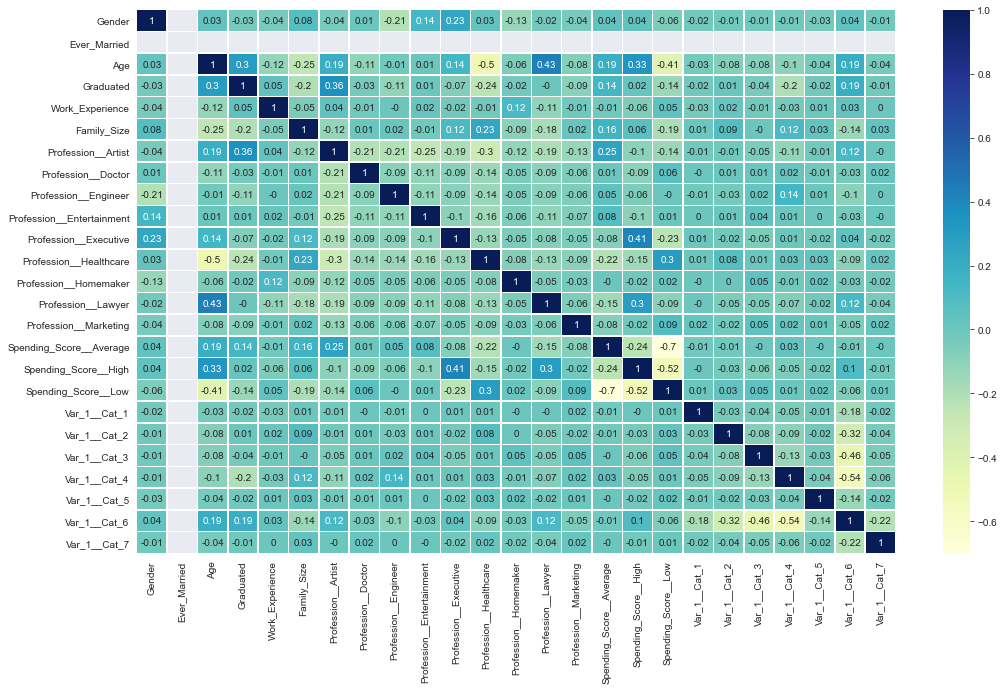

In [152]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(xgb_train.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()


In [81]:
# Model pipeline

In [185]:


import matplotlib.pyplot as plt



# machine learning
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_tree
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc, recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 




import gc


train: [4034 4035 4036 ... 8065 8066 8067] dev: [   0    1    2 ... 4031 4032 4033]
[04:41:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.34346	validation_1-mlogloss:1.34845


/Users/tsung-chin.han/ZDOC/Interview_2021_great/Tableau/customer_expectation/venv/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10]	validation_0-mlogloss:1.10035	validation_1-mlogloss:1.15062
[20]	validation_0-mlogloss:1.00059	validation_1-mlogloss:1.08926
[30]	validation_0-mlogloss:0.94352	validation_1-mlogloss:1.06483
[40]	validation_0-mlogloss:0.90643	validation_1-mlogloss:1.05652
[50]	validation_0-mlogloss:0.87638	validation_1-mlogloss:1.05372
[60]	validation_0-mlogloss:0.85162	validation_1-mlogloss:1.05311
[70]	validation_0-mlogloss:0.82694	validation_1-mlogloss:1.05475
[75]	validation_0-mlogloss:0.81600	validation_1-mlogloss:1.05599

Model Report
Classification report: 

              precision    recall  f1-score   support

           1       0.44      0.42      0.43      1029
           2       0.40      0.34      0.37       907
           3       0.59      0.57      0.58       957
           4       0.61      0.73      0.67      1141

    accuracy                           0.53      4034
   macro avg       0.51      0.52      0.51      4034
weighted avg       0.52      0.53      0.52      4034

Accura

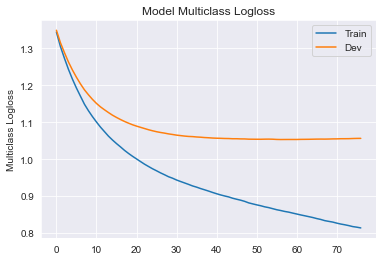


Number of times a feature is used to split the data across all trees:


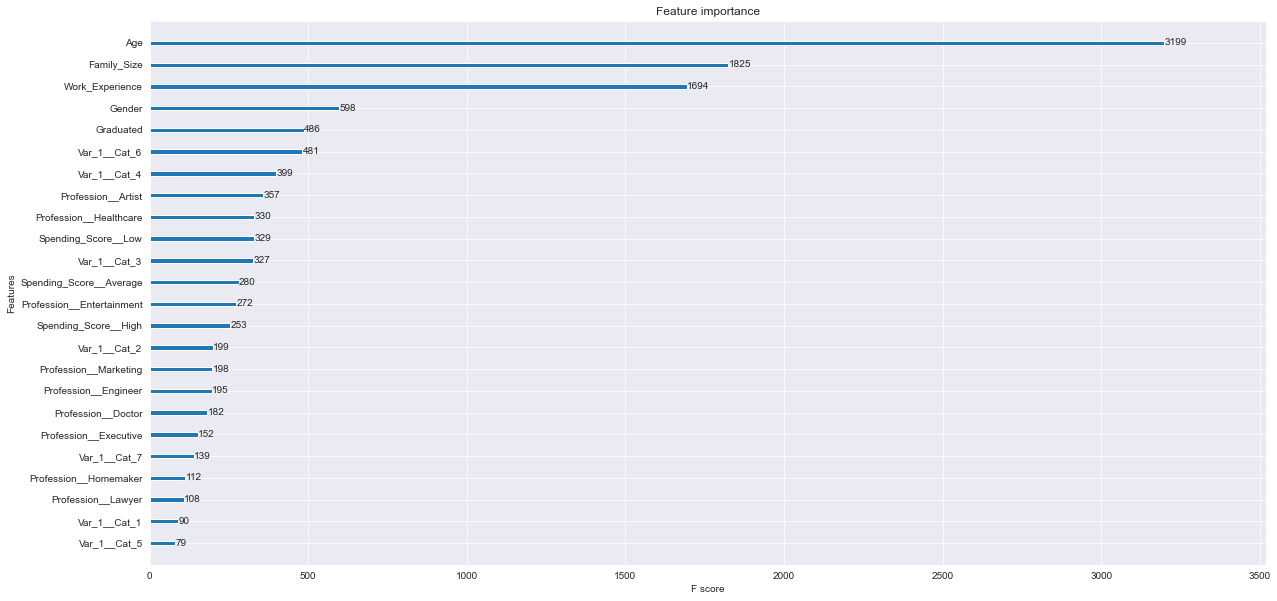


Number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits:


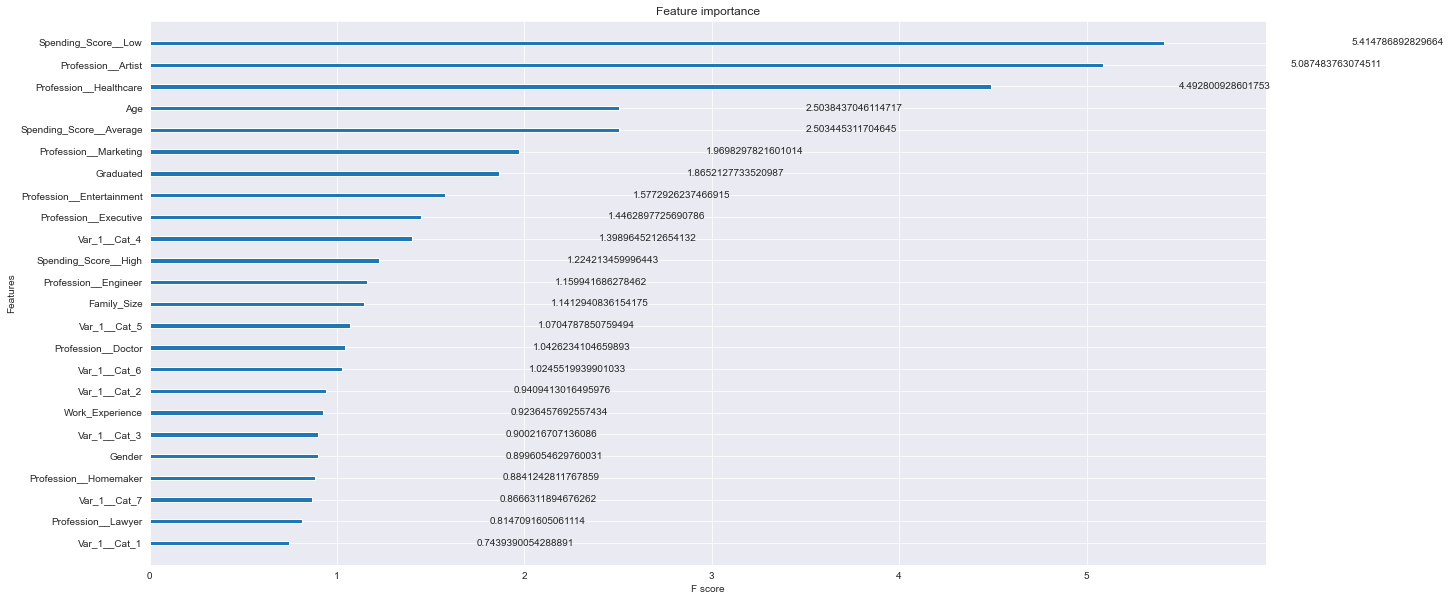


The average training loss reduction gained when using a feature for splitting:


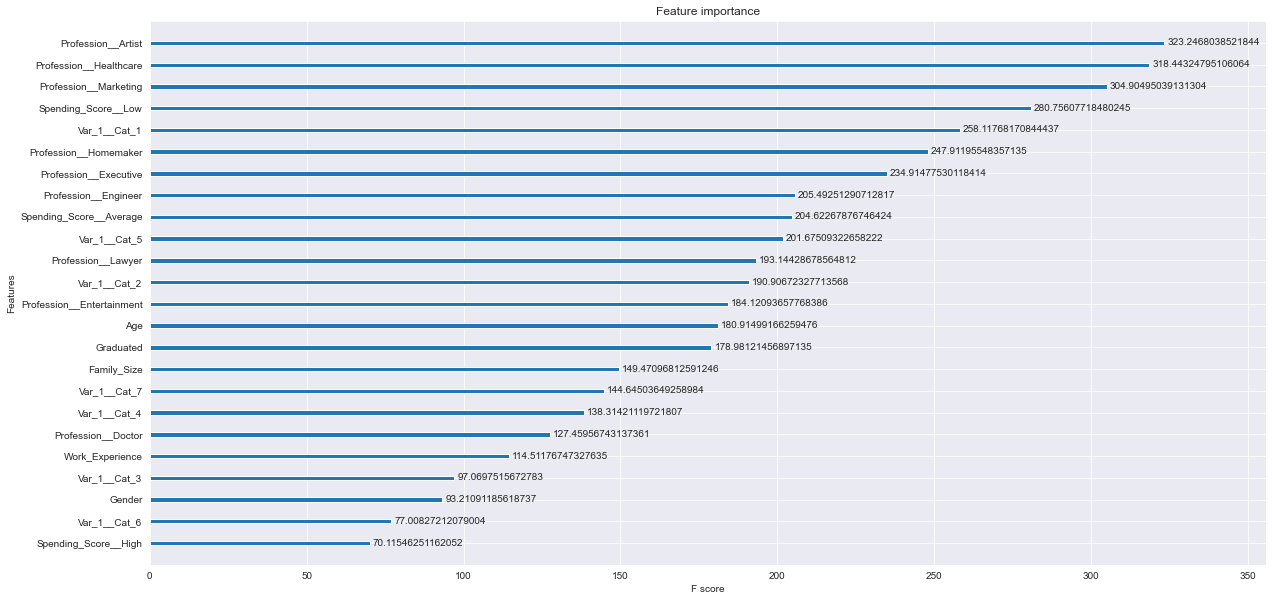

train: [   0    1    2 ... 4031 4032 4033] dev: [4034 4035 4036 ... 8065 8066 8067]
[04:41:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.34155	validation_1-mlogloss:1.34767
[10]	validation_0-mlogloss:1.09076	validation_1-mlogloss:1.14889


/Users/tsung-chin.han/ZDOC/Interview_2021_great/Tableau/customer_expectation/venv/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-mlogloss:0.98936	validation_1-mlogloss:1.09117
[30]	validation_0-mlogloss:0.93071	validation_1-mlogloss:1.07041
[40]	validation_0-mlogloss:0.88944	validation_1-mlogloss:1.06280
[50]	validation_0-mlogloss:0.85867	validation_1-mlogloss:1.06200
[60]	validation_0-mlogloss:0.83277	validation_1-mlogloss:1.06299
[68]	validation_0-mlogloss:0.81347	validation_1-mlogloss:1.06450

Model Report
Classification report: 

              precision    recall  f1-score   support

           1       0.42      0.52      0.46       943
           2       0.41      0.28      0.34       951
           3       0.56      0.54      0.55      1013
           4       0.65      0.70      0.68      1127

    accuracy                           0.52      4034
   macro avg       0.51      0.51      0.51      4034
weighted avg       0.52      0.52      0.51      4034

Accuracy : 0.6589
Log Loss Score (Train): 0.861549


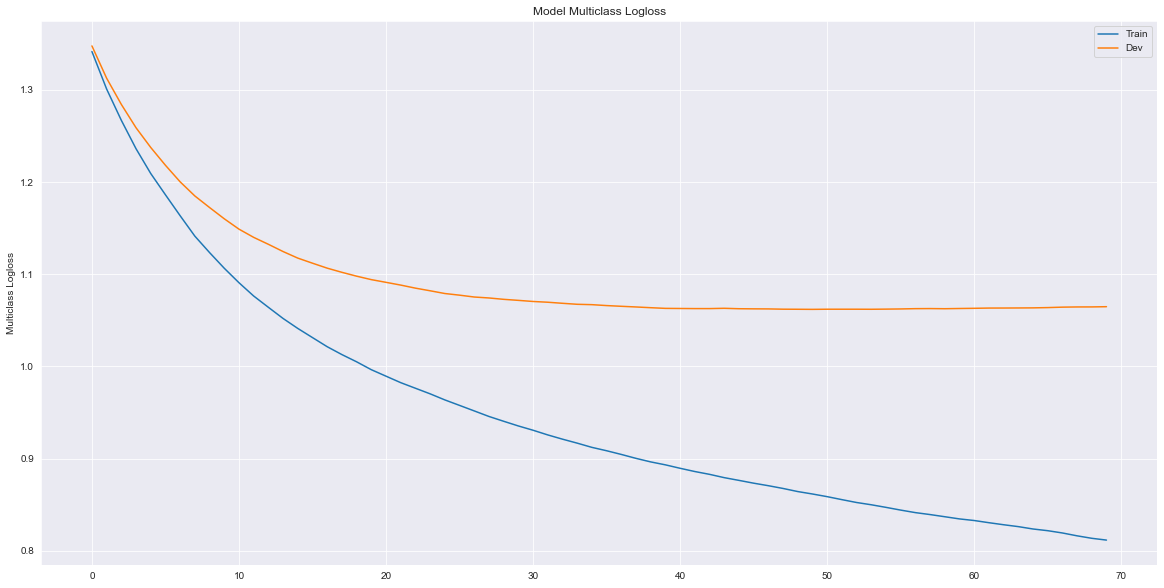


Number of times a feature is used to split the data across all trees:


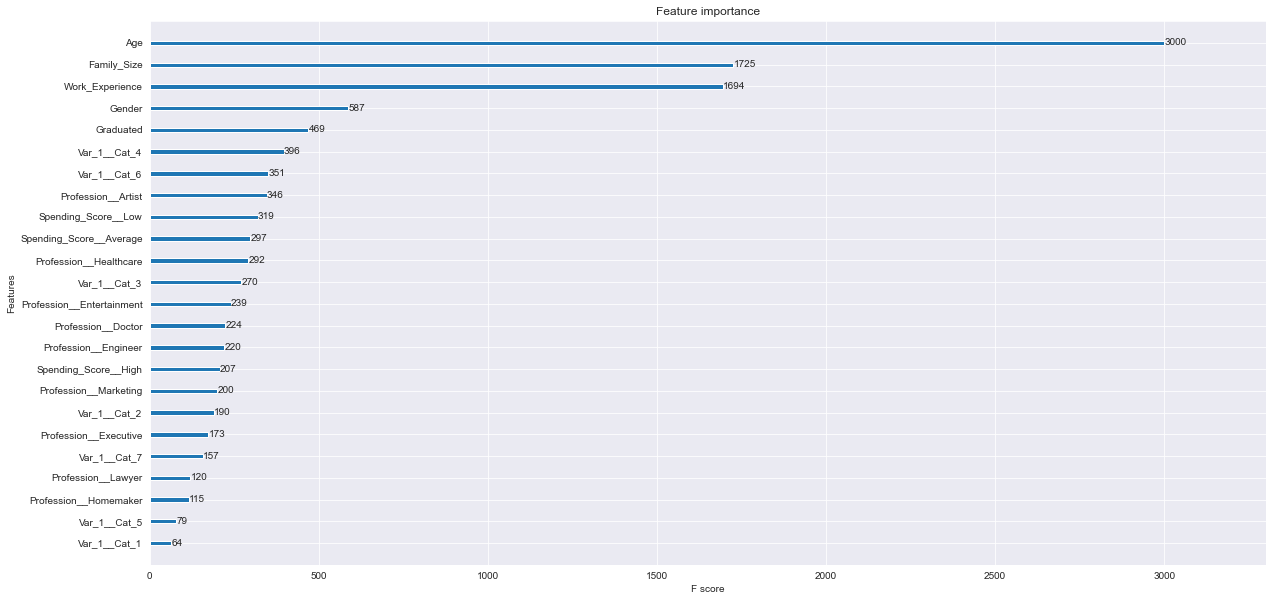


Number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits:


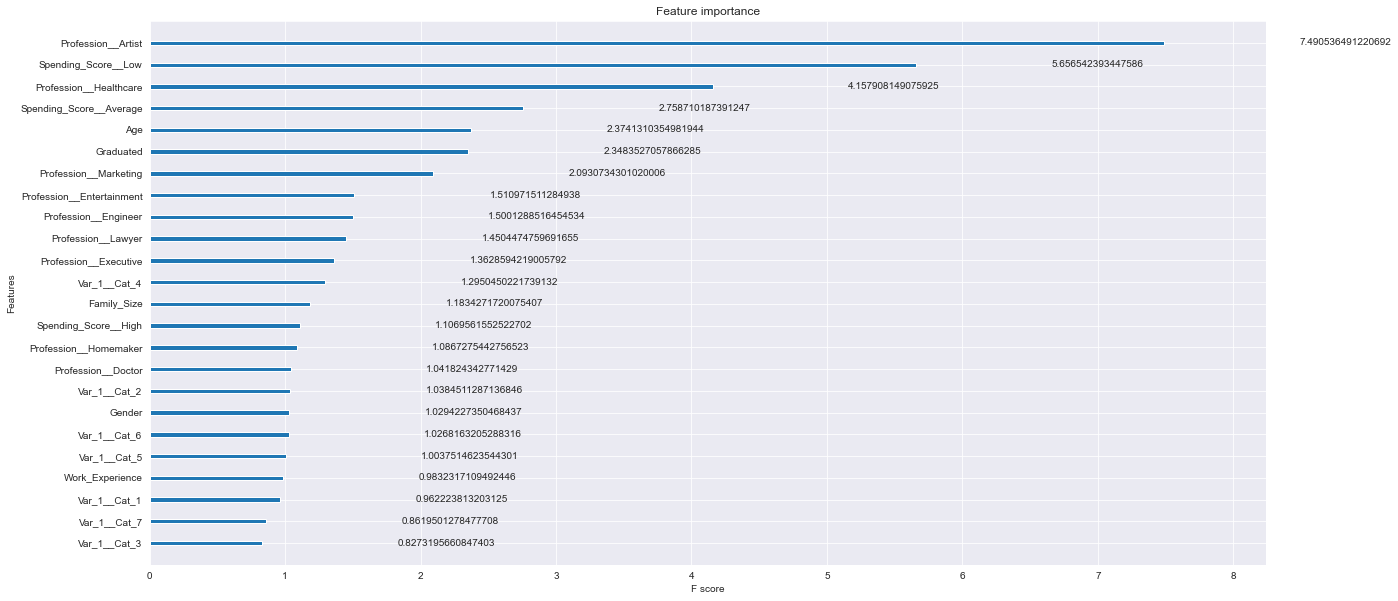


The average training loss reduction gained when using a feature for splitting:


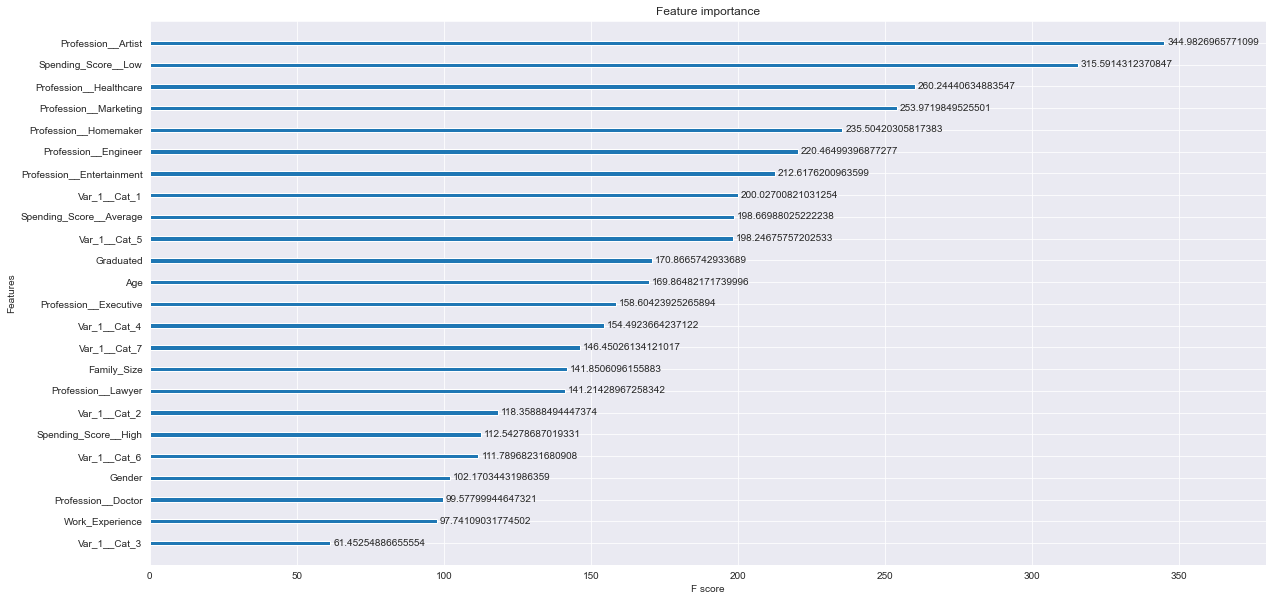

In [189]:
    
    # cv setup
    n_split=2
    kf = KFold(n_splits=n_split) # Define the split - into 2 folds 
    kf.get_n_splits(xgb_train) # returns the number of splitting iterations in the cross-validator
    KFold(n_splits=n_split, random_state=999, shuffle=True)

    for train_index, val_index in kf.split(xgb_train):

        """ (1) - Split train and dev set """
        print("train:", train_index, "dev:", val_index)
        X_train, X_dev = xgb_train.iloc[train_index], xgb_train.iloc[val_index]
        y_train, y_dev = y.iloc[train_index], y.iloc[val_index]

      # Implement the gradient boosting algorithm
        model = XGBClassifier(objective='multi:softprob',
                              num_class=4,
                              learning_rate=0.1,
                              max_depth=6,
                              subsample=0.9,
                              colsample_bylevel=0.8,
                              colsample_bytree=0.8,
                              reg_alpha = 0,
                              reg_lambda=1,
                              nthread=8,
                              random_state=999,
                              silent=True
                              
                                )

        # fit the algo, with error metric to be rmse
        model.fit(X_train, y_train,
                      eval_metric='mlogloss', 
                      eval_set=[(X_train, y_train), (X_dev, y_dev)],
                      verbose=10,
                      early_stopping_rounds=20
                     )

        #Collect the prediction values from both train and test set"""    
        X_train_pred = model.predict(X_train)
        X_dev_pred = model.predict(X_dev)
        
        
        ######
        # make predictions for dev data - validation purposes
#         y_pred = model.predict(X_dev)
#         predictions = [round(value) for value in y_pred]
        
        # evaluate predictions
#         accuracy = accuracy_score(y_dev, X_dev_pred)
#         print("Accuracy: %.2f%%" % (accuracy * 100.0))
        
        
        # Print model report:
        print('\nModel Report')
        print('Classification report: \n')
        print(classification_report(y_dev, X_dev_pred))
        print('Accuracy : %.4g' % accuracy_score(y_train, X_train_pred))
        print('Log Loss Score (Train): %f' % log_loss(y_train, model.predict_proba(X_train)))
#         feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#         feat_imp.plot(kind='bar', title='Feature Importances')
#         plt.ylabel('Feature Importance Score')

        
        
        # retrieve performance metrics
        results = model.evals_result()
        epochs = len(results['validation_0']['mlogloss'])
        x_axis = range(0, epochs)
        
        # plot multiclassification log loss
        fig, ax = plt.subplots()
        ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
        ax.plot(x_axis, results['validation_1']['mlogloss'], label='Dev')
        ax.legend()
        plt.ylabel('Multiclass Logloss')
        plt.title('Model Multiclass Logloss')
        plt.show()
        
        # visualize feature importance
        print('\nNumber of times a feature is used to split the data across all trees:')
        plt.rcParams["figure.figsize"] = (20, 10)
        plot_importance(model)
        plt.show()

        print('\nNumber of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits:')
        plt.rcParams["figure.figsize"] = (20, 10)
        plot_importance(model, importance_type='gain')
        plt.show()

        print('\nThe average training loss reduction gained when using a feature for splitting:')
        plt.rcParams["figure.figsize"] = (20, 10)
        plot_importance(model, importance_type='cover')
        plt.show()
        


In [190]:
# prediction pipeline

In [191]:
# on test data

In [230]:
# prediction by the model applied in the test dataset
predicted_value = model.predict(xgb_test)

# create a data frame with mapping ID 
prediction_key = modeling[obs_train:]['ID']
prediction = pd.DataFrame(prediction_key, columns=['ID']).reset_index()
prediction['Predicted_Segmentation'] = predicted_value
# mapping to lookup value
# inverse lookup
target_encoding_lookup_ivd = {v: k for k, v in target_encoding_lookup.items()}
prediction['Predicted_Segmentation'] = prediction['Predicted_Segmentation']\
                                        .apply(lambda x: target_encoding_lookup_ivd[x])

# check and show top 10 rows for the prediction files
print(prediction.shape)
prediction.head(15)


(2627, 3)


,index,ID,Predicted_Segmentation
0,8068,458989,A
1,8069,458994,A
2,8070,458996,A
3,8071,459000,C
4,8072,459001,D
5,8073,459003,B
6,8074,459005,A
7,8075,459008,C
8,8076,459013,C
9,8077,459014,D


In [231]:
# check if any nan values
prediction.isnull().sum()


index                     0
ID                        0
Predicted_Segmentation    0
dtype: int64

  Predicted_Segmentation  count
0                      A    790
1                      B    414
2                      C    600
3                      D    823


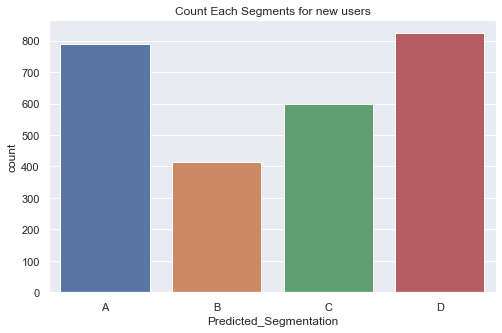

In [239]:
tmp = prediction.copy()
tmp = sqldf("""
select
    Predicted_Segmentation,
    count(Predicted_Segmentation) as count
from tmp
group by 1

""")
print(tmp)
sns.set(rc={'figure.figsize':(8, 5)})
sns.barplot(x='Predicted_Segmentation' , y='count', data=tmp).set_title('Count Each Segments for new users')
del tmp

